<a href="https://colab.research.google.com/github/ORACHPAULFRANCIS/Personal-Practice-Projects/blob/Google-Colab-Commits/Geocode_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required python libraries to process vector data
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Define our geodataframe
gdf = gpd.read_file(r'/content/Data/Districts.shp')

In [3]:
# Read our imported data
gdf.head()

,F15Regions,DName2016,DNama2017,dc2017,DName2018,dc2018,DName2019,Label,geometry
0,TORO,KABAROLE,KABAROLE,405,KABAROLE,405,KABAROLE,Kabarole,"POLYGON ((189394.074 65644.674, 189395.692 656..."
1,BUNYORO,MASINDI,MASINDI,409,MASINDI,409,MASINDI,Masindi,"POLYGON ((361048.676 253893.744, 360926.725 24..."
2,BUNYORO,KAGADI,KAGADI,427,KAGADI,427,KAGADI,Kagadi,"POLYGON ((240154.738 123808.03, 240267.124 123..."
3,TORO,KABAROLE,BUNYANGABU,430,BUNYANGABU,430,BUNYANGABU,Bunyangabu,"POLYGON ((190602.201 65272.766, 190703.802 652..."
4,NORTH BUGANDA,NAKASONGOLA,NAKASONGOLA,109,NAKASONGOLA,109,NAKASONGOLA,Nakasongola,"POLYGON ((456296.631 160857.855, 457393.843 15..."


<Axes: >

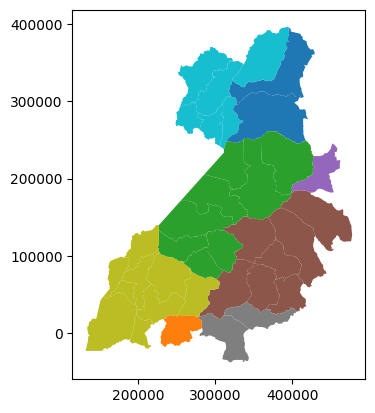

In [4]:
# Let us change the column name F15Regions to Regions
gdf.rename(columns={'F15Regions': 'Regions'}, inplace=True)
# Change DName2019 to Districts
gdf.rename(columns={'DName2019': 'Districts'}, inplace=True)
# Plot the data
gdf.plot('Regions')

<Axes: >

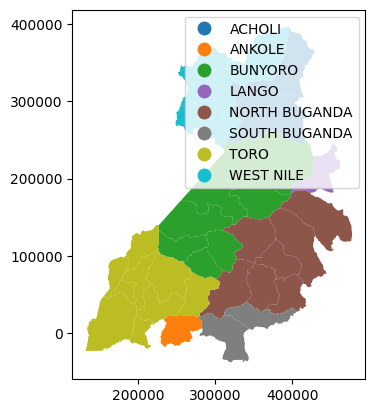

In [5]:
# Give a title and legend to our plot
gdf.plot('Regions', legend=True,)

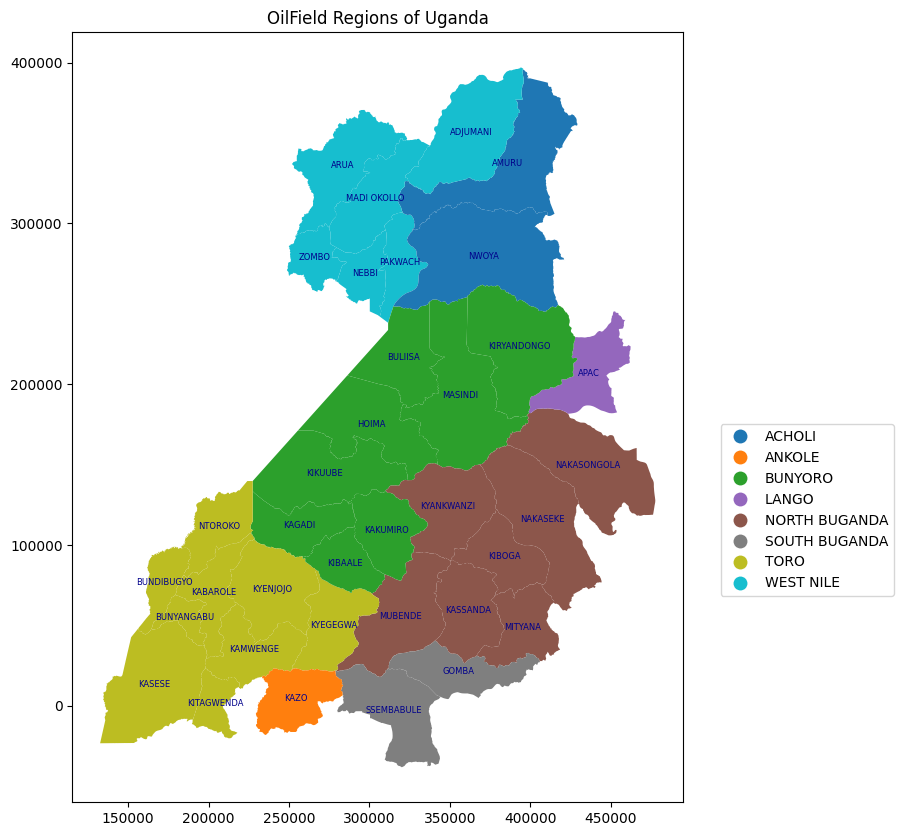

In [6]:
# Take legend out of map figure
fig, ax = plt.subplots(1, figsize=(10,10))
# Add a title to the plot "OilField Regions of Uganda"
ax.set_title('OilField Regions of Uganda')
# Add labels using the 'Districts' column
for idx, row in gdf.iterrows():
    # Get centroid for labeling
    centroid = row.geometry.centroid
    # Plot text at centroid
    ax.text(
        centroid.x, centroid.y,
        str(row['Districts']),
        fontsize=6, ha='center', va='center',
        color='darkblue'
    )
# Add a scale to our map
ax.set_aspect('equal')
# Plot the data
gdf.plot(ax=ax, column='Regions', legend=True, legend_kwds={'loc': 'upper left'})
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.05, 0.5))
# Download our plot
plt.savefig('OilFieldRegions.png', dpi=300, bbox_inches='tight')

In [7]:
# Know our crs
gdf.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# Let us write some vector data
gdf.to_file(r'/content/Data/Districts.geojson', driver='GeoJSON', encoding='utf-8')

In [9]:
gdf.head()

,Regions,DName2016,DNama2017,dc2017,DName2018,dc2018,Districts,Label,geometry
0,TORO,KABAROLE,KABAROLE,405,KABAROLE,405,KABAROLE,Kabarole,"POLYGON ((189394.074 65644.674, 189395.692 656..."
1,BUNYORO,MASINDI,MASINDI,409,MASINDI,409,MASINDI,Masindi,"POLYGON ((361048.676 253893.744, 360926.725 24..."
2,BUNYORO,KAGADI,KAGADI,427,KAGADI,427,KAGADI,Kagadi,"POLYGON ((240154.738 123808.03, 240267.124 123..."
3,TORO,KABAROLE,BUNYANGABU,430,BUNYANGABU,430,BUNYANGABU,Bunyangabu,"POLYGON ((190602.201 65272.766, 190703.802 652..."
4,NORTH BUGANDA,NAKASONGOLA,NAKASONGOLA,109,NAKASONGOLA,109,NAKASONGOLA,Nakasongola,"POLYGON ((456296.631 160857.855, 457393.843 15..."


In [10]:
# Let us find and replace TORO with TOORO in the column for Regions
gdf['Regions'] = gdf['Regions'].str.replace('TORO', 'TOORO')

In [11]:
gdf.head()

,Regions,DName2016,DNama2017,dc2017,DName2018,dc2018,Districts,Label,geometry
0,TOORO,KABAROLE,KABAROLE,405,KABAROLE,405,KABAROLE,Kabarole,"POLYGON ((189394.074 65644.674, 189395.692 656..."
1,BUNYORO,MASINDI,MASINDI,409,MASINDI,409,MASINDI,Masindi,"POLYGON ((361048.676 253893.744, 360926.725 24..."
2,BUNYORO,KAGADI,KAGADI,427,KAGADI,427,KAGADI,Kagadi,"POLYGON ((240154.738 123808.03, 240267.124 123..."
3,TOORO,KABAROLE,BUNYANGABU,430,BUNYANGABU,430,BUNYANGABU,Bunyangabu,"POLYGON ((190602.201 65272.766, 190703.802 652..."
4,NORTH BUGANDA,NAKASONGOLA,NAKASONGOLA,109,NAKASONGOLA,109,NAKASONGOLA,Nakasongola,"POLYGON ((456296.631 160857.855, 457393.843 15..."


In [12]:
gdf.columns

Index(['Regions', 'DName2016', 'DNama2017', 'dc2017', 'DName2018', 'dc2018',
       'Districts', 'Label', 'geometry'],
      dtype='object')